<a href="https://colab.research.google.com/github/lamyeamaha/tensorflow-codes/blob/main/Tensorflow_mnist_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New things learnt from this project**
- *from_logits = True* in loss in model.compile -> use this when you have not used softmax activation function in your last layer.
It means the function is expecting raw logits
When making predictions, you need to add the softmax activation layer to the built model

On the other hand,
- if *from_logits = False*  -> it expects that you have already used a activation function like the softmax.

*Raw logits-* unnormalized values produced by the model's final layer before applying any activation function like softmax.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
data = {
    'x_train_shape' : [x_train.shape],
    'y_train_shape' : [y_train.shape]
}
df = pd.DataFrame(data, index = ['data']).transpose()
df

,data
x_train_shape,"(60000, 28, 28)"
y_train_shape,"(60000,)"


In [ ]:
data = {
    'x_train' :[x_train.shape, x_train[0]],
    'y_train' : [y_train.shape, y_train],
    'x_test' : [x_test.shape, x_test[0]],
    'y_test' : [y_test.shape, y_test]
}

df2 = pd.DataFrame(data, index = ['shape', 'data'])
df2

,x_train,y_train,x_test,y_test
shape,"(60000, 28, 28)","(60000,)","(10000, 28, 28)","(10000,)"
data,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [ ]:
unique_values = np.unique(y_train)
print(unique_values)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Preprocess the Data**

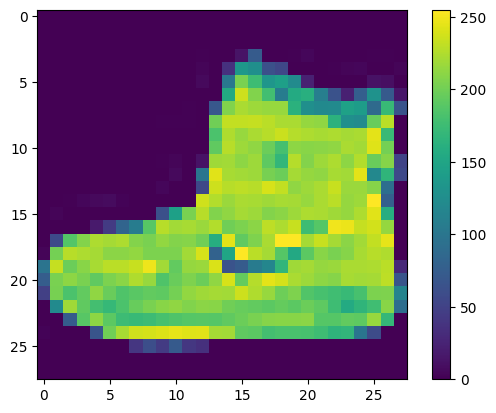

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

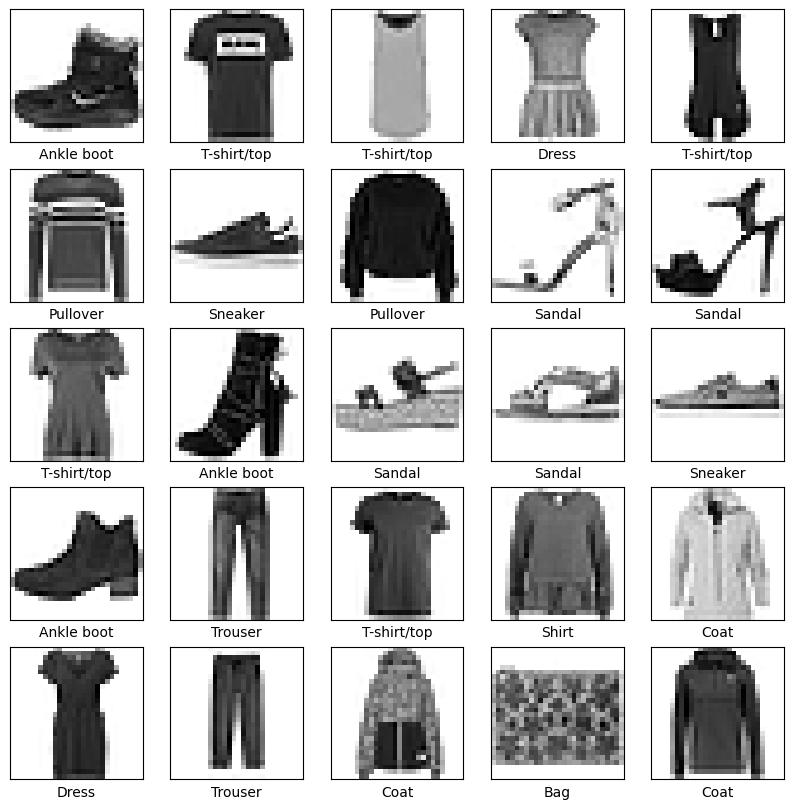

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    #tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #use from_logits=True when you do not use a softmax layer when building your model. But you need to use a softmax activation function when you are making predicitons
    metrics = ['accuracy']
)

model.fit(x_train,y_train, epochs=2)


Epoch 1/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4964 - accuracy: 0.8275
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8643


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test loss: ",test_loss)
print("test accuracy: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8597
test loss:  0.398103266954422
test accuracy:  0.8597000241279602


Make predictions

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
y_pred = probability_model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.9774401e-05, 3.7302552e-06, 3.8110193e-05, ..., 1.8240274e-01,
        7.5019232e-04, 7.1892583e-01],
       [8.1583734e-05, 6.1113292e-09, 9.9798852e-01, ..., 3.7331822e-12,
        1.6597217e-07, 5.2753326e-13],
       [1.9333325e-05, 9.9993449e-01, 1.8601746e-06, ..., 2.9737257e-09,
        4.8714991e-08, 2.9206089e-11],
       ...,
       [7.0863545e-02, 9.6486531e-07, 1.3386802e-03, ..., 6.6157031e-06,
        9.1589516e-01, 6.6922766e-08],
       [2.5135942e-05, 9.9746305e-01, 2.0141179e-06, ..., 3.3717242e-07,
        8.4161894e-07, 1.9347649e-06],
       [4.3228376e-04, 1.0232673e-04, 6.9077557e-04, ..., 8.0627643e-02,
        4.1834116e-03, 2.2912679e-04]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
def plot_img(i):
  # plt.figure()
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img = x_test[i]
  true_label, predicted_label = class_names[y_test[i]], class_names[y_pred_classes[i]]
  if (true_label == predicted_label):
    color="blue"
  else:
    color="red"
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(y_pred[i]),
                                true_label),
                                color=color)
  plt.imshow(img)



def plot_value_array(i):
  true_label = y_test[i]
  predicted_label = y_pred_classes[i]
  # plt.figure()
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  img = x_test[i]
  this_plot = plt.bar(range(10), y_pred[i], color="#777777")
  if (true_label == predicted_label):
    this_plot[true_label].set_color('blue')
  else:
    this_plot[true_label].set_color('blue')
    this_plot[predicted_label].set_color('red')
  # plt.show()



  # print(true_label)
  # print(predicted_label)


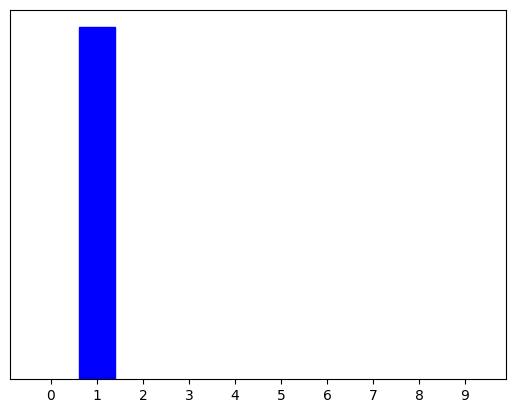

In [ ]:
plot_value_array(2)

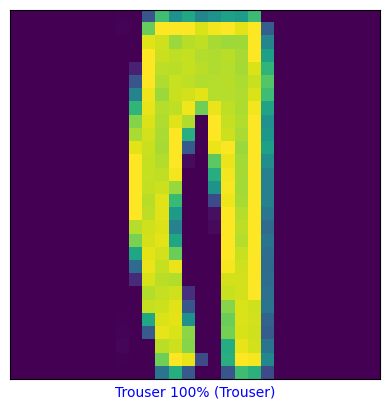

In [ ]:
plot_img(2)


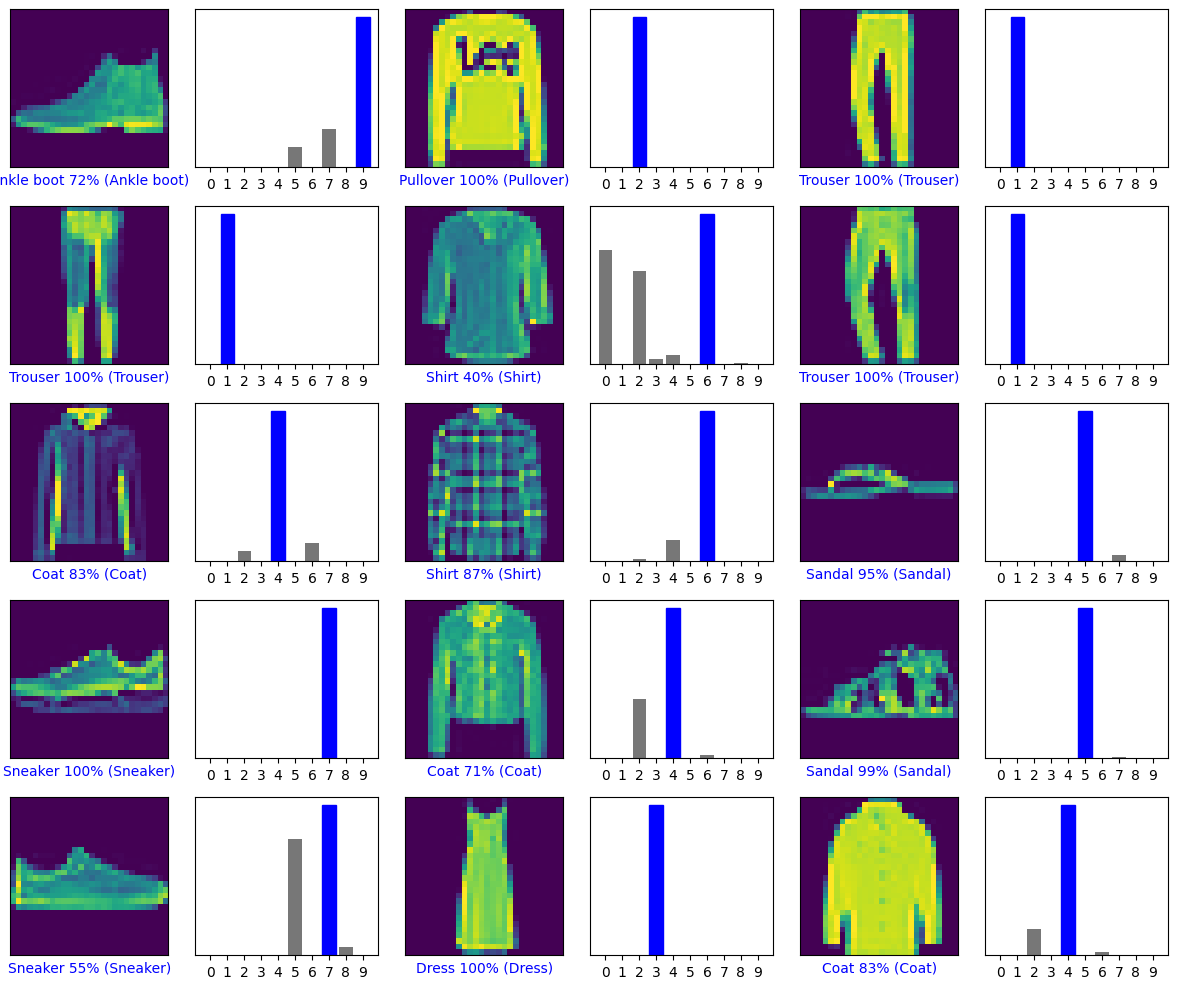

In [ ]:
rows = 5
col = 3
plt.figure(figsize=(2*2*col, 2*rows))
for i in range(rows*col):
  plt.subplot(rows, 2*col, i*2+1)
  plot_img(i)
  plt.subplot(rows, 2*col,i*2+2)
  plot_value_array(i)


plt.tight_layout()

**Make a single prediction**

In [ ]:
single_img = x_test[3]
single_img.shape


(28, 28)

In [ ]:
x_test[:1].shape

(1, 28, 28)

In [ ]:
img = (np.expand_dims(single_img,0))

print(img.shape)

(1, 28, 28)


1/1 [==============================] - 0s 82ms/step
1
1


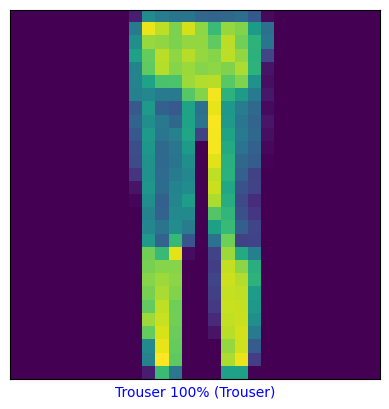

In [ ]:
single_prediction = probability_model.predict(img)
predicted_class = np.argmax(single_prediction[0])
print(predicted_class)
true_label = y_test[3]
print(true_label)


plot_img(3)


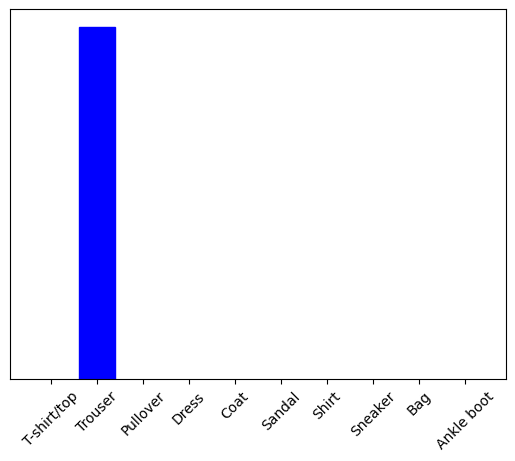

In [ ]:
plot_value_array(3)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[818,   2,  25,  36,   4,   0, 107,   1,   7,   0],
       [  2, 952,   1,  36,   4,   0,   4,   0,   1,   0],
       [ 15,   0, 863,   8,  94,   0,  20,   0,   0,   0],
       [ 28,   5,  30, 870,  47,   0,  19,   0,   1,   0],
       [  0,   0, 155,  23, 794,   0,  28,   0,   0,   0],
       [  0,   0,   0,   1,   0, 936,   0,  44,   1,  18],
       [149,   2, 171,  33, 114,   0, 522,   0,   9,   0],
       [  0,   0,   0,   0,   0,  15,   0, 971,   0,  14],
       [  5,   1,  21,   5,  10,   4,   7,   5, 942,   0],
       [  0,   0,   0,   0,   0,   5,   1,  65,   0, 929]])

<Axes: >

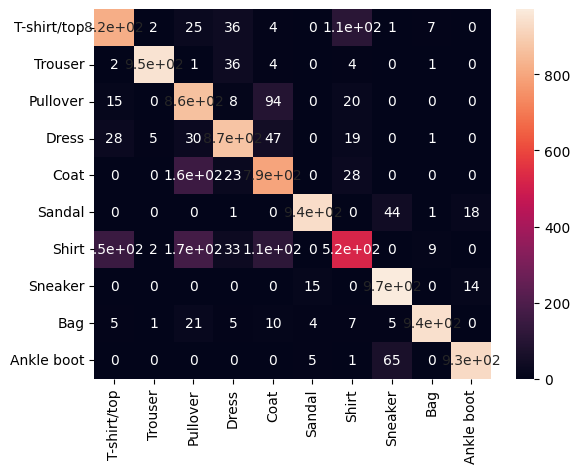

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, xticklabels = class_names, yticklabels=class_names)